In [1]:
import numpy as np
#import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Load Datasets

In [2]:
train_set = pd.read_csv("Data/train.csv")
test_sett = pd.read_csv("Data/test.csv")
sample_set = pd.read_csv("Data/sample_submission.csv")

Data Overview

In [3]:
train_set.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_set = train_set.drop('Id', axis=1)

In [6]:
data_summary = train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
int_vars_df = train_set.select_dtypes(include='int64')
obj_vars_df = train_set.select_dtypes(include='object')
float_vars_df = train_set.select_dtypes(include='float64')
print(f"Int Dtype (rows, cols) :- ",int_vars_df.shape)#35 cols have int values | 1460 rows
print(type(int_vars_df))
print(f"Object Dtype (rows, cols) :- ",obj_vars_df.shape)#35 cols have int values | 1460 rows
print(type(obj_vars_df))
print(f"float Dtype (rows, cols) :- ",float_vars_df.shape)#35 cols have int values | 1460 rows
print(type(float_vars_df))

Int Dtype (rows, cols) :-  (1460, 34)
<class 'pandas.core.frame.DataFrame'>
Object Dtype (rows, cols) :-  (1460, 43)
<class 'pandas.core.frame.DataFrame'>
float Dtype (rows, cols) :-  (1460, 3)
<class 'pandas.core.frame.DataFrame'>


In [8]:
#numerical types inlcude int and float
num_vars_df = train_set.select_dtypes(include= ['float64', 'int64'])
num_var_col_lst = num_vars_df.columns
print(num_var_col_lst)
print(len(num_var_col_lst))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
37


In [9]:
num_vars_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


(array([ 5.,  0.,  5.,  6.,  6.,  7., 32., 29., 23., 35., 59., 67., 73.,
        92., 89., 91., 62., 60., 57., 73., 67., 54., 45., 33., 30., 31.,
        31., 33., 26., 23., 17., 19., 18., 18., 14., 11.,  5.,  8., 13.,
        12., 10.,  6.,  6.,  5.,  1.,  3.,  5.,  6.,  5.,  4.,  3.,  2.,
         3.,  1.,  3.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 34900.,  42101.,  49302.,  56503.,  63704.,  70905.,  78106.,
         85307.,  92508.,  99709., 106910., 114111., 121312., 128513.,
        135714., 142915., 150116., 157317., 164518., 171719., 178920.,
        186121., 193322., 200523., 207724., 214925., 222126., 229327.,
        236528., 243729., 250930., 258131., 265332., 272533., 279734.,
        286935., 294136., 301337., 308538., 315739., 322940., 330141.,
        

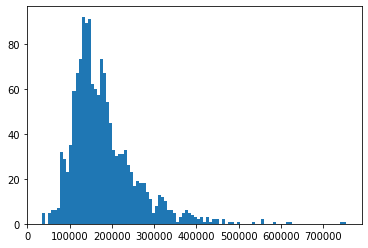

In [10]:
#SalePrice distribution
print(num_vars_df['SalePrice'].describe())
#plt.figure(figsize=(6,7))
plt.hist(num_vars_df['SalePrice'], bins= 100, histtype='bar')

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

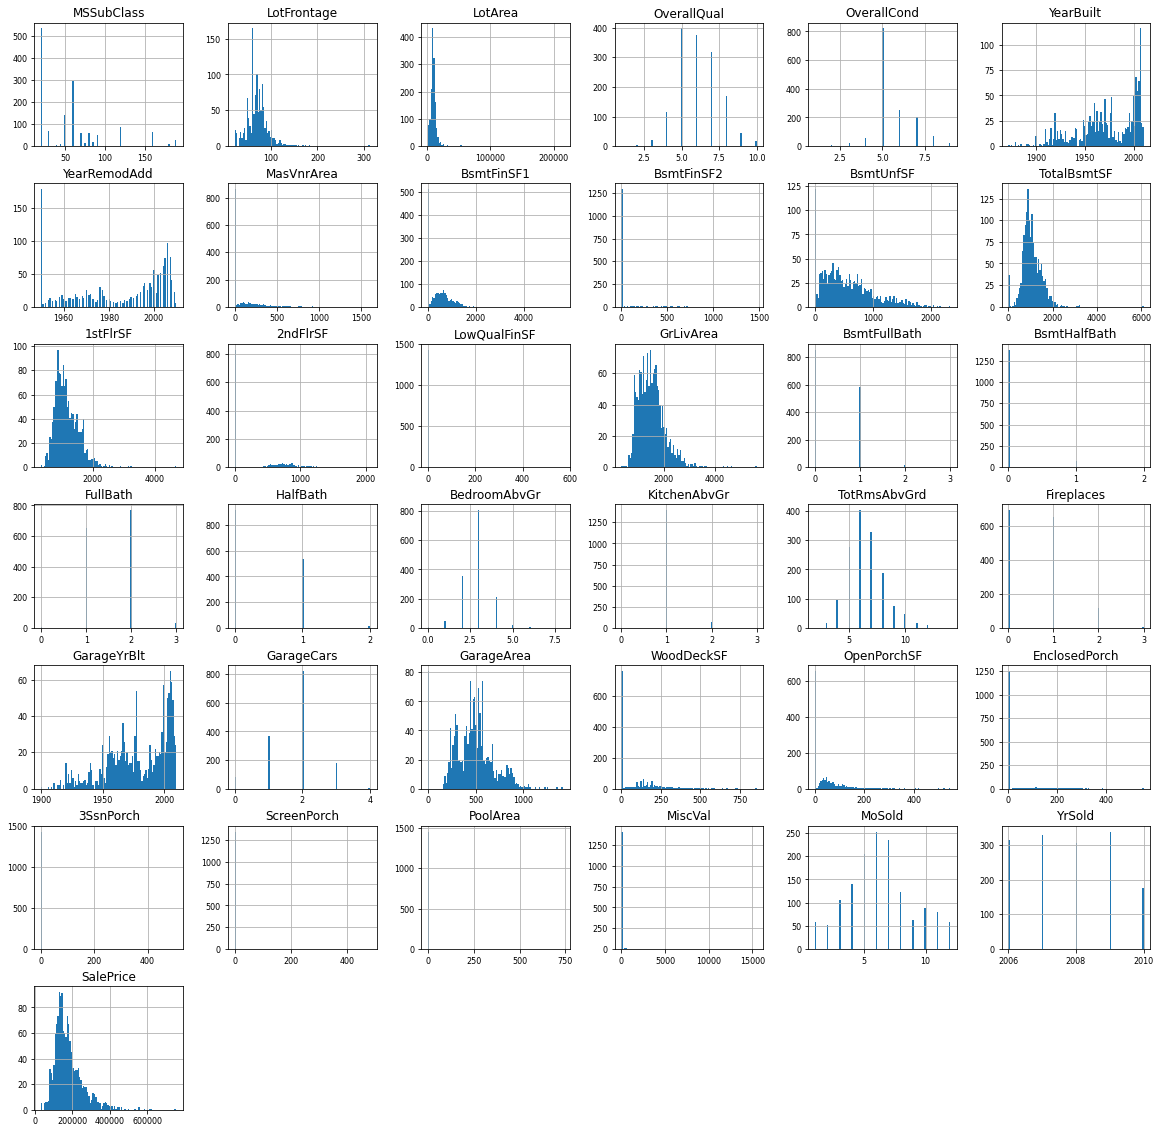

In [11]:
num_vars_df.hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8)

Filling up the NULL values

In [12]:
null_cols = num_vars_df.columns[num_vars_df.isnull().any()]

In [13]:
null_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [14]:
num_vars_df.isnull().shape[0]

1460

In [15]:
var = num_vars_df.isnull().sum()/num_vars_df.shape[0]*100
print(var)

MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice         0.000000
d

In [16]:
LF_mean = num_vars_df['LotFrontage'].mean()
MasVnrArea_mean = num_vars_df['MasVnrArea'].mean()
GarageYrBlt_mean = num_vars_df['GarageYrBlt'].mean()

In [17]:
#All null values replcaed with their median
values = {'LotFrontage': LF_mean, 'MasVnrArea': MasVnrArea_mean, 'GarageYrBlt':GarageYrBlt_mean}
num_vars_df_filled = num_vars_df.fillna(value= values)

In [18]:
#Checking if median insertion was successful or not
num_vars_df_filled.isnull().any()

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

Looking for Correlations

In [21]:
corr_matrix = num_vars_df_filled.corr()
# print(corr_matrix)
corr_matrix = corr_matrix['SalePrice'].sort_values(ascending=False)


In [23]:
#combining attr
num_vars_df_filled['TotalSF'] = num_vars_df_filled['TotalBsmtSF'] + num_vars_df_filled['1stFlrSF'] + num_vars_df_filled['2ndFlrSF']
num_vars_df_filled.drop(columns=['TotalBsmtSF','1stFlrSF','2ndFlrSF'], inplace=True)

In [24]:
corr_matrix = num_vars_df_filled.corr()
corr_matrix = corr_matrix['SalePrice'].sort_values(ascending=False)

In [26]:
corr_matrix

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.782260
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [27]:
type(corr_matrix)

pandas.core.series.Series

In [42]:
cols_to_remove = corr_matrix[corr_matrix < 0].index.to_list()

In [43]:
print(type(cols_to_remove))

<class 'list'>


In [44]:
cols_to_remove

['BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

In [45]:
num_vars_df_filled.shape

(1460, 35)

In [46]:
num_vars_df_filled.drop(columns=cols_to_remove, inplace=True)

In [48]:
num_vars_df_filled.shape

(1460, 26)

In [52]:
num_vars_df_filled.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,GrLivArea,BsmtFullBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,TotalSF
0,65.0,8450,7,2003,2003,196.0,706,150,1710,1,...,2,548,0,61,0,0,0,2,208500,2566
1,80.0,9600,6,1976,1976,0.0,978,284,1262,0,...,2,460,298,0,0,0,0,5,181500,2524
2,68.0,11250,7,2001,2002,162.0,486,434,1786,1,...,2,608,0,42,0,0,0,9,223500,2706
3,60.0,9550,7,1915,1970,0.0,216,540,1717,1,...,3,642,0,35,0,0,0,2,140000,2473
4,84.0,14260,8,2000,2000,350.0,655,490,2198,1,...,3,836,192,84,0,0,0,12,250000,3343


Selecting ML model

In [68]:
#Spliting the dataframe in X , Y labels
Y = num_vars_df_filled['SalePrice'] #target variable
X = num_vars_df_filled.drop(columns='SalePrice') #dependent variable

from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size=0.2, random_state=42)


In [70]:
print("Size of X_train : -", X_train.shape)
print("Size of Y_train : -", Y_train.shape)
print("Size of X_test : -", X_test.shape)
print("Size of Y_test : -", Y_test.shape)

Size of X_train : - (1168, 25)
Size of Y_train : - (1168,)
Size of X_test : - (292, 25)
Size of Y_test : - (292,)


In [76]:
#Importing Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [109]:
predictions = model.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
print('Mean Absolute Error:', mae)
r2 = r2_score(Y_test, predictions)
print('r2 Score:', r2)

Mean Absolute Error: 23553.655317548062
r2 Score: 0.8147863828652896


In [110]:
predictions.shape

(292,)

Text(0.5, 1.0, 'Scatter chart - Linear regression model')

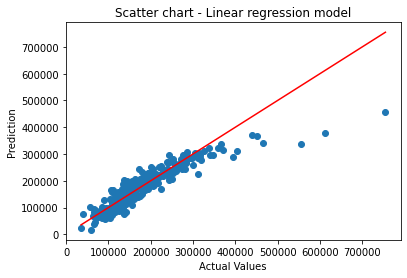

In [111]:
plt.scatter(Y_test, predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.title('Scatter chart - Linear regression model')

range(0, 292)

In [1]:
print("helllo")

helllo
